# DATA EXTRACTION

### Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Ignoring Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [3]:
data = pd.read_csv('pikachu.csv')

In [4]:
data.head(8)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data['Speed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: Speed
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [7]:
unique_values = data['Type 1'].unique()
print(unique_values)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


# DATA CLEANING

In [8]:
#replacing the '?' with Null Values 'NaN'
data.replace('?', np.nan, inplace=True)

In [9]:
data.head(10)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
#extracting the duplicate rows
data[data.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [12]:
# dropping the duplicate rows
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(800, 13)

Checking if every categorical column has a correct data-type

In [14]:
# Identifying categorical columns i.e. columns with 'object' data type
categorical_columns = data.select_dtypes(include=['object']).columns

# Making a for loop through each categorical column and print its name and data type
for col in categorical_columns:
    print(f'Column: {col}, Data Type: {data[col].dtype}')

Column: Name, Data Type: object
Column: Type 1, Data Type: object
Column: Type 2, Data Type: object


Hence, every categorical column has correct data-type

Now, Checking if every numerical column has correct data-type

In [15]:
# Identifying numerical columns i.e. columns with int64 or float64 data types)
numerical_columns = data.select_dtypes(include=['int64']).columns

# Making a for loop through each numerical column and print its name and data type
for col in numerical_columns:
    print(f'Column: {col}, Data Type: {data[col].dtype}')

Column: #, Data Type: int64
Column: Total, Data Type: int64
Column: HP, Data Type: int64
Column: Attack, Data Type: int64
Column: Defense, Data Type: int64
Column: Sp. Atk, Data Type: int64
Column: Sp. Def, Data Type: int64
Column: Speed, Data Type: int64
Column: Generation, Data Type: int64


Hence, every numerical column has correct data-type

Renaming columns for better visualization

## Handling the missing values

1) For categorical columns

In [16]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Replacing missing values with the mode for each categorical column
for col in categorical_columns:
    mode_value = data[col].mode()[0]  
    data[col].fillna(mode_value, inplace=True)

# Displaying the updated DataFrame to verify changes
data[categorical_columns].isnull().sum()

Name      0
Type 1    0
Type 2    0
dtype: int64

Now all the missing values of categorical columns are filled

2. For numerical columns

In [17]:
# Identifying numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns

# Replacing missing values with the mean for each numerical column
for col in numerical_columns:
    mean_value = data[col].mean()  
    data[col].fillna(mean_value, inplace=True)  

# Displaying the updated DataFrame to verify changes
data[numerical_columns].isnull().sum()  

#             0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
dtype: int64

Now, all missing values of numerical columns are filled

# EDA

## 1. Univariate Analysis

### i. Categorical Variables

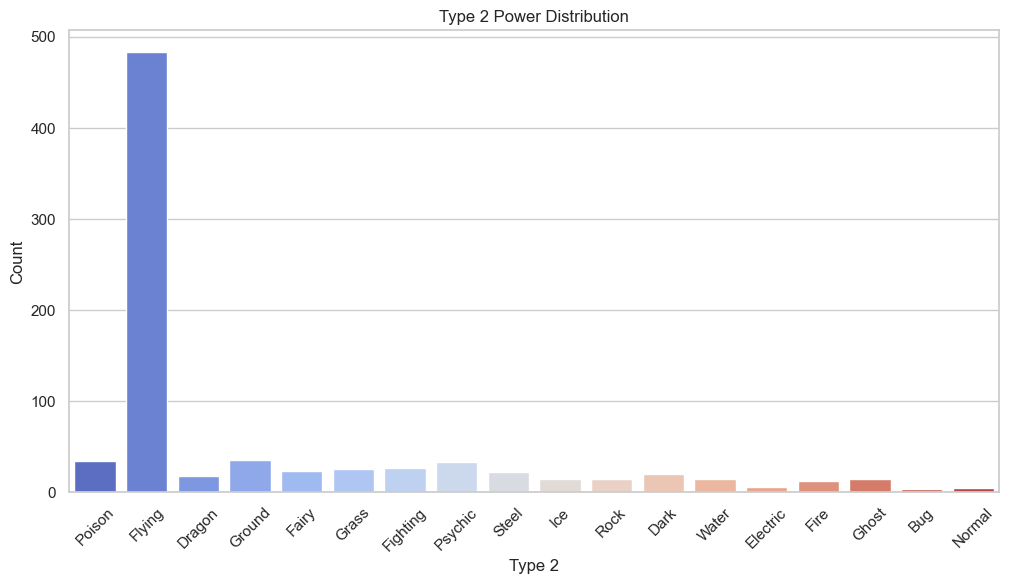

In [64]:
# Count Plot for 'Type 2' column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Type 2', palette='coolwarm')
plt.title('Type 2 Power Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

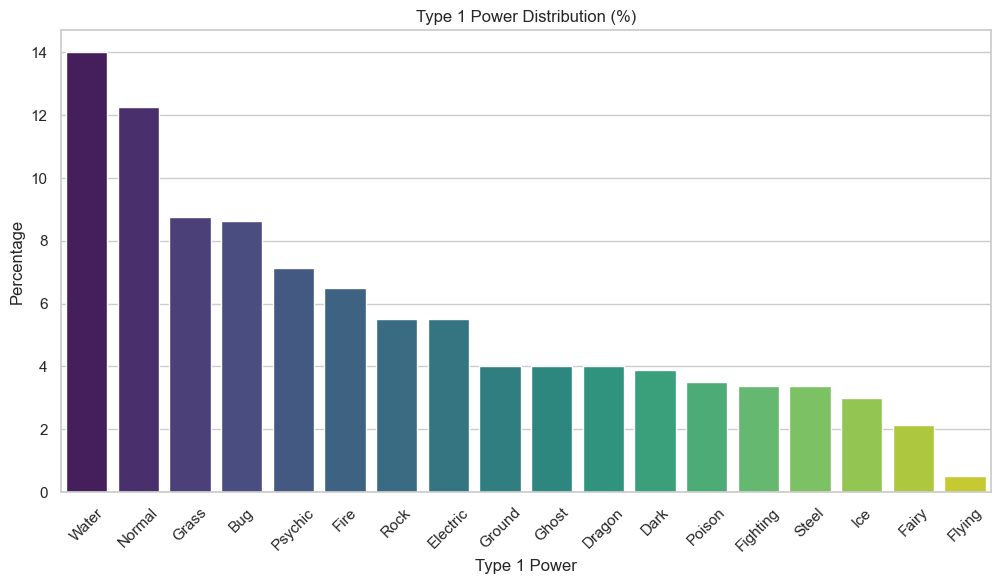

In [19]:
# Count Percentage for 'Type 1' column
workclass_counts = data['Type 1'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')
plt.title('Type 1 Power Distribution (%)')
plt.xlabel('Type 1 Power')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Pie Chart

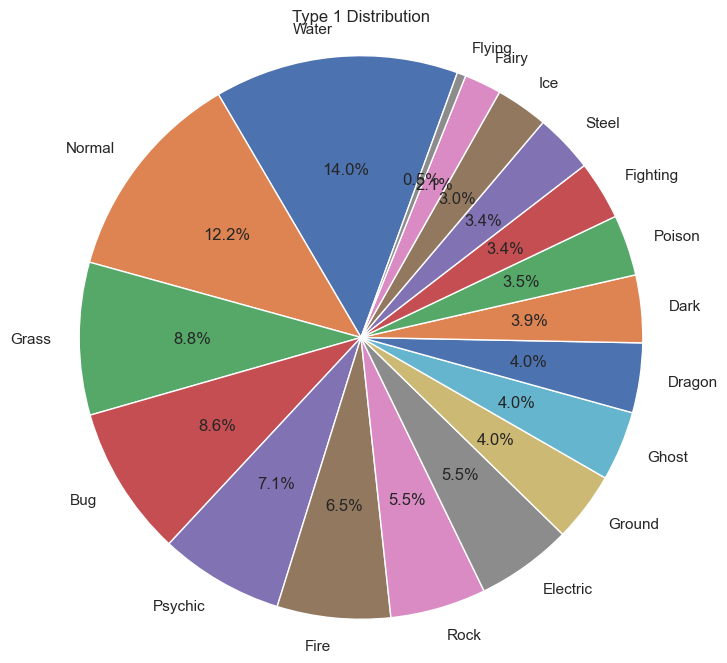

In [40]:
# Pie Chart for 'Type 1 ' Distribution
workclass_counts = data['Type 1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(workclass_counts, labels=workclass_counts.index, autopct='%1.1f%%', startangle=70)
plt.title('Type 1 Distribution')
plt.axis('equal')
plt.show()

### ii) Numerical Variables

In [21]:
# Descriptive Statistics for Attack
print("Descriptive Statistics for Attack:")
print(f"Min: {data['Attack'].min()}")
print(f"Max: {data['Attack'].max()}")
print(f"Mean: {data['Attack'].mean()}")
print(f"Median: {data['Attack'].median()}")
print(f"Mode: {data['Attack'].mode()[0]}")
print(f"Range: {data['Attack'].max() - data['Attack'].min()}")
print(f"Variance: {data['Attack'].var()}")
print(f"Standard Deviation: {data['Attack'].std()}")

Descriptive Statistics for Attack:
Min: 5
Max: 190
Mean: 79.00125
Median: 75.0
Mode: 100
Range: 185
Variance: 1053.4805991864832
Standard Deviation: 32.45736586949845


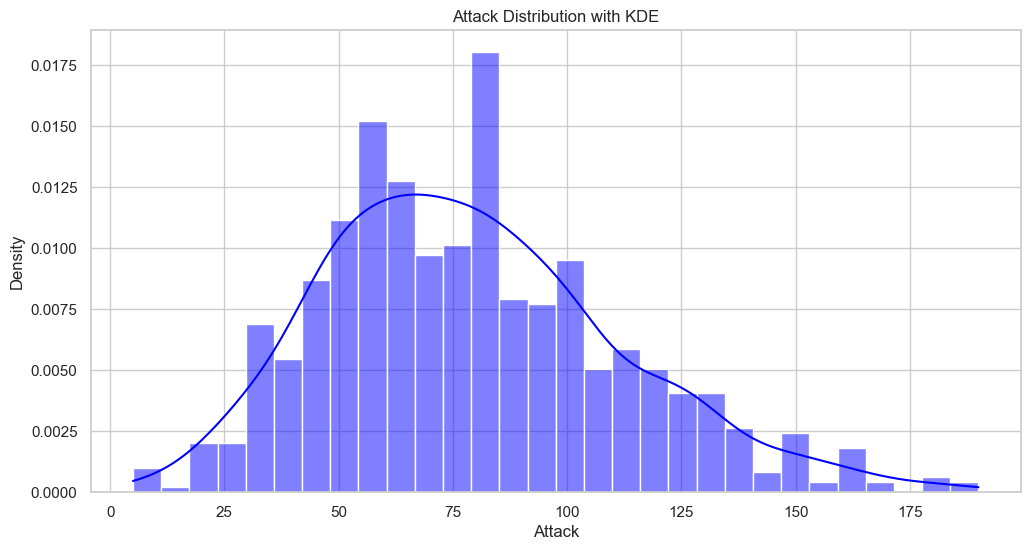

In [63]:
# Histogram and KDE for Attack
plt.figure(figsize=(12, 6))
sns.histplot(data=data['Attack'], bins=30, kde=True, color='blue', stat="density")
plt.title('Attack Distribution with KDE')
plt.xlabel('Attack')
plt.ylabel('Density')
plt.show()

#### For defense column

In [23]:
# Descriptive Statistics for Defense
print("Descriptive Statistics for Defense column:")
print(f"Min: {data['Defense'].min()}")
print(f"Max: {data['Defense'].max()}")
print(f"Mean: {data['Defense'].mean()}")
print(f"Median: {data['Defense'].median()}")
print(f"Mode: {data['Defense'].mode()[0]}")
print(f"Range: {data['Defense'].max() - data['Defense'].min()}")
print(f"Variance: {data['Defense'].var()}")
print(f"Standard Deviation: {data['Defense'].std()}")

Descriptive Statistics for Defense column:
Min: 5
Max: 230
Mean: 73.8425
Median: 70.0
Mode: 70
Range: 225
Variance: 972.4107071339174
Standard Deviation: 31.183500559332934


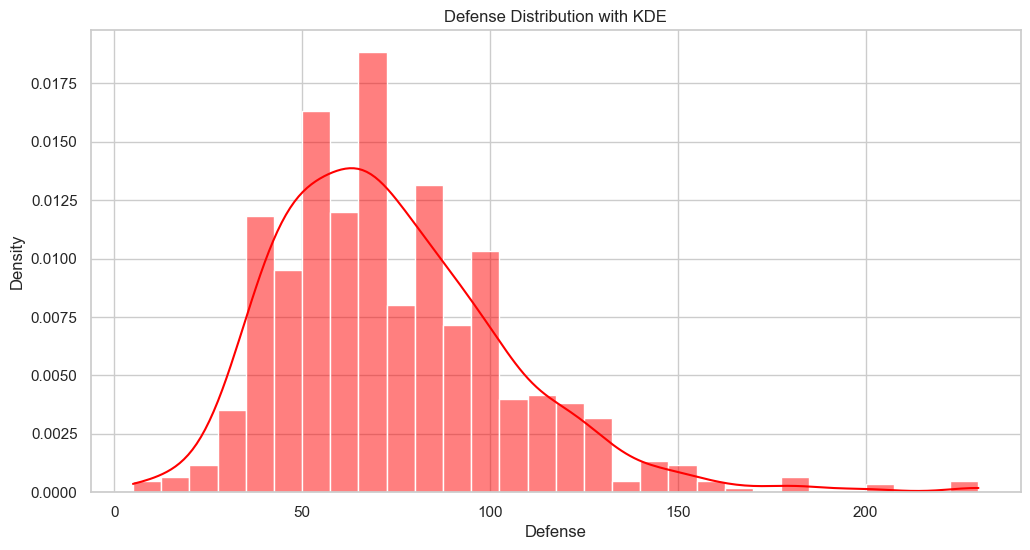

In [62]:
# Histogram and KDE for Defense
plt.figure(figsize=(12, 6))
sns.histplot(data=data['Defense'], bins=30, kde=True, color='red', stat="density")
plt.title('Defense Distribution with KDE')
plt.xlabel('Defense')
plt.ylabel('Density')
plt.show()

#### Box Plot

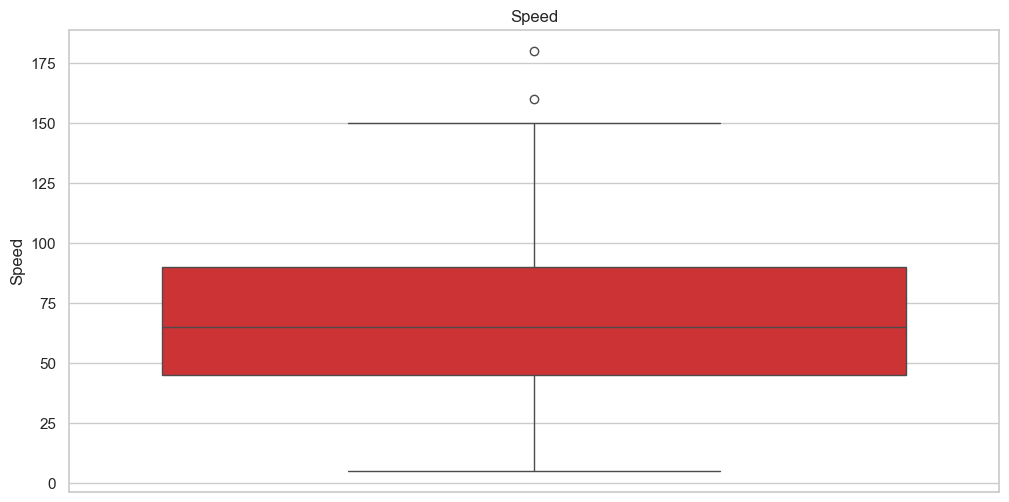

In [61]:
# Boxplot for Speed
plt.figure(figsize=(12, 6))
sns.boxplot(y='Speed', data=data, palette='Set1')
plt.title('Speed')
plt.ylabel('Speed')
plt.show()

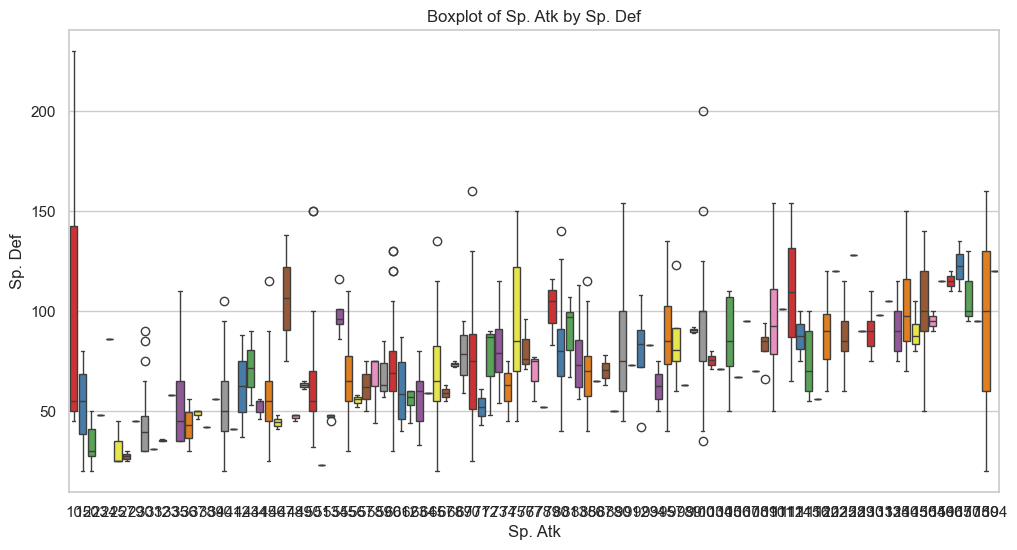

In [59]:
# Boxplot for Sp.Atk by Sp.Def
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sp. Atk', y='Sp. Def', data=data, palette='Set1')
plt.title('Boxplot of Sp. Atk by Sp. Def')
plt.xlabel('Sp. Atk')
plt.ylabel('Sp. Def')
plt.show()

### Q-Q Plot

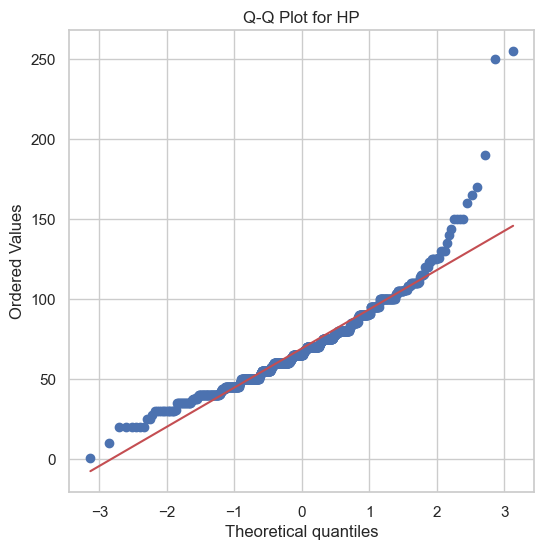

In [27]:
import scipy.stats as stats

# Q-Q Plot for HP
plt.figure(figsize=(6, 6))
stats.probplot(data['HP'], dist="norm", plot=plt)
plt.title('Q-Q Plot for HP')
plt.show()

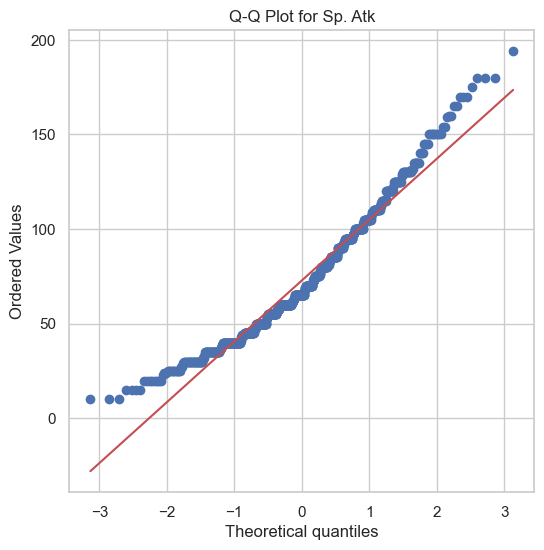

In [28]:
# Q-Q Plot for Sp. Atk
plt.figure(figsize=(6, 6))
stats.probplot(data['Sp. Atk'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sp. Atk')
plt.show()

### Violin Plot

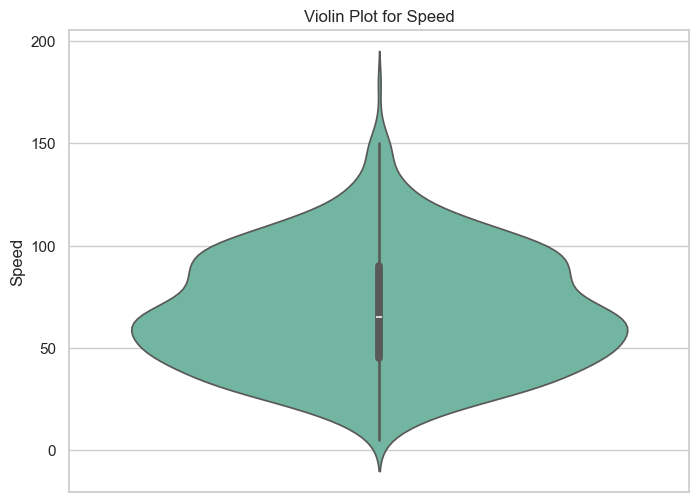

In [29]:
# Violin plot for 'Speed' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['Speed'], palette='Set2')
plt.title('Violin Plot for Speed')
plt.ylabel('Speed')
plt.show()

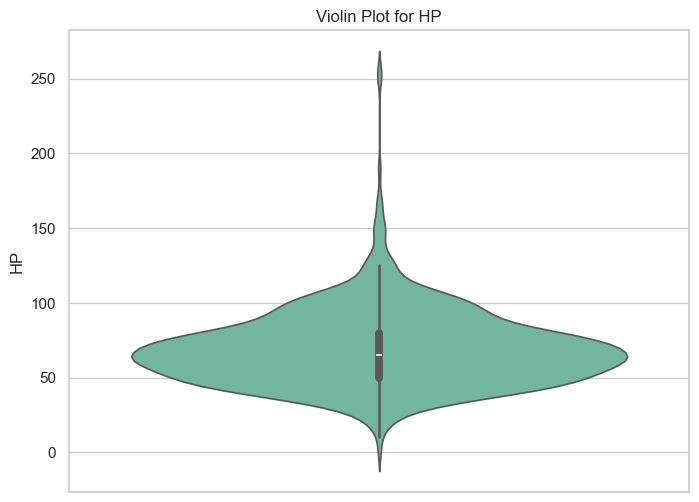

In [41]:
# Violin plot for 'HP' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['HP'], palette='Set2')
plt.title('Violin Plot for HP')
plt.ylabel('HP')
plt.show()

## 2. Bivariate Analysis

### i) Categorical and Categorical

#### Chi-Square Test

In [31]:
from scipy.stats import chi2_contingency

# Chi-Square Test for Type1 and Type2
contingency_table = pd.crosstab(data['Type 1'], data['Type 2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 805.203320459486, p-value: 3.003964545284666e-50


#### Bar Chart

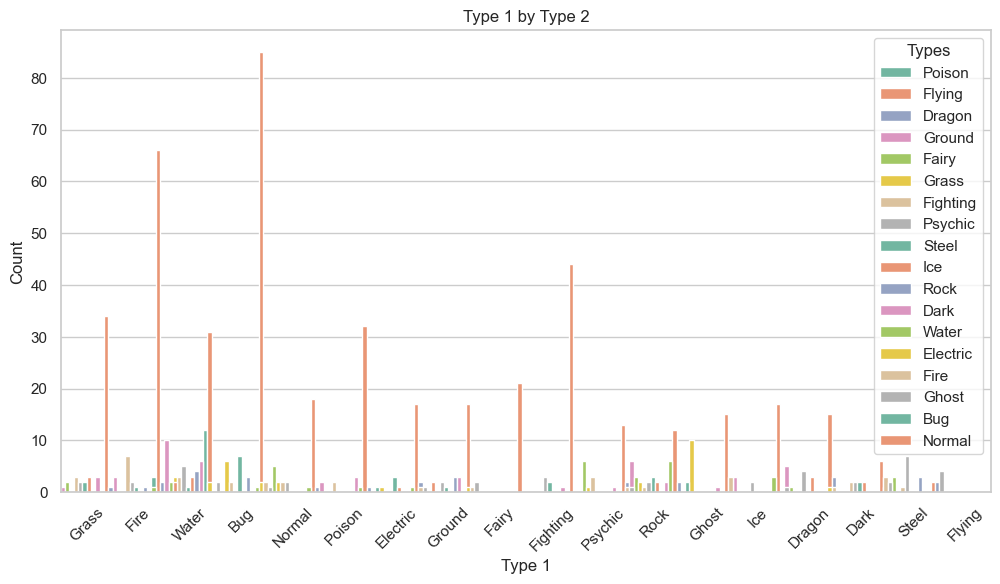

In [49]:
# Bar Chart of Type1 by Type2
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Type 1', hue='Type 2', palette='Set2' , width=1.5)
plt.title('Type 1 by Type 2')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Types')
plt.show()

#### ii) Numerical and Numerical

#### Correlation

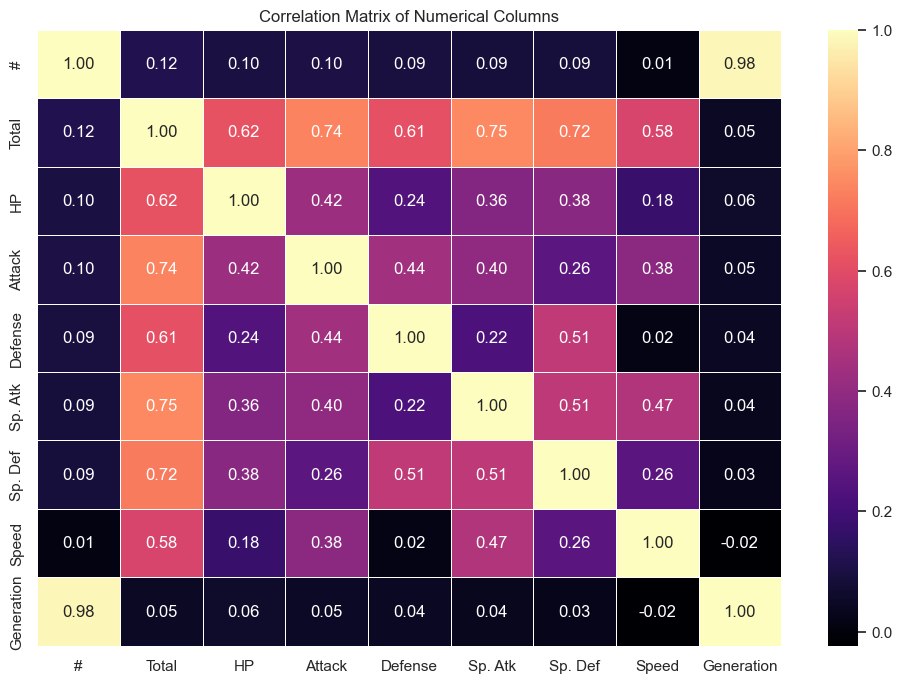

In [51]:
# Correlation Matrix
# Selecting only numerical columns for correlation
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

#### Scatter Plot

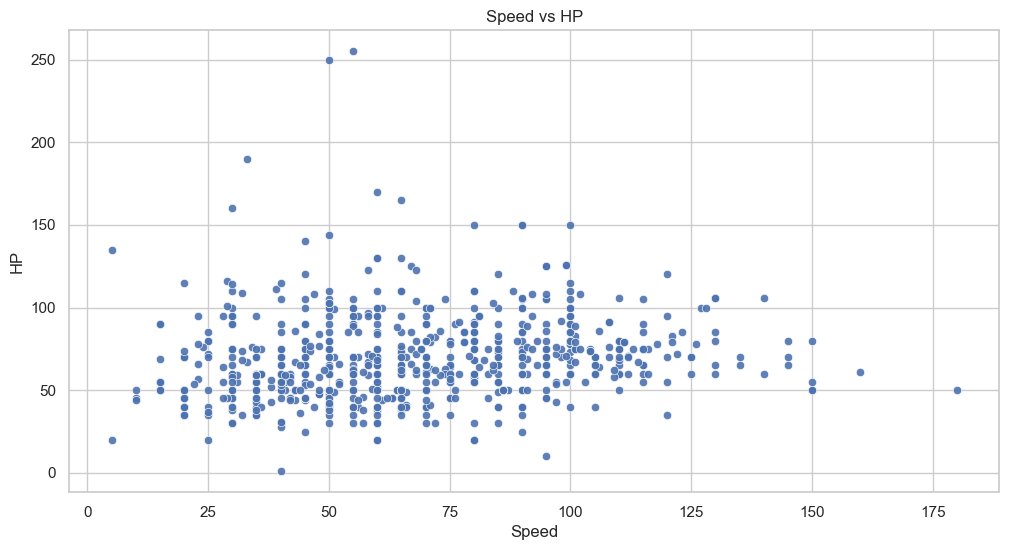

In [53]:
# Scatter Plot for Speed and HP
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Speed', y='HP', data=data, alpha=0.9)
plt.title('Speed vs HP')
plt.xlabel('Speed')
plt.ylabel('HP')
plt.show()

### iii) Categorical and Numerical

#### Z-Test/ T-Test/ ANOVA

#### Z - Test

In [35]:
# Check the groups
group1 = data[data['HP'] <= 50]['Speed']  # Assuming HP is numeric
group2 = data[data['HP'] > 50]['Speed']

# Check if groups are empty
print(f"Group 1 Length: {len(group1)}, Group 2 Length: {len(group2)}")

if len(group1) == 0 or len(group2) == 0:
    print("One of the groups is empty. Check the data.")
else:
    # Check standard deviation of each group
    print(f"Group 1 Std: {group1.std()}, Group 2 Std: {group2.std()}")

    # Calculate the Z-score only if there is non-zero variance
    if group1.std() > 0 and group2.std() > 0:
        z_score = (group1.mean() - group2.mean()) / (data['Speed'].std() / (len(data) ** 0.5))
        print(f"Z-Score: {z_score}")
    else:
        print("One of the groups has zero variance, cannot compute Z-score.")


Group 1 Length: 211, Group 2 Length: 589
Group 1 Std: 25.393596734891283, Group 2 Std: 28.92490127823076
Z-Score: -17.000933529347737


Conclusion:
The Z-score of -17.0009335 indicates a statistically significant difference between the average  of the two HP groups, with those having `<=50` being significantly faster in terms of speed than those having HP `>50`. This suggests that speed has a strong correlation with hp in the dataset.

#### T - Test

In [36]:
from scipy.stats import ttest_ind

# T-Test 
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")

T-Statistic: -7.764714545836544, p-value: 2.5095189074492306e-14


Conclusion:
The T-test result with a T-statistic of -7.76471 and a p-value of 2.50e-14 indicates a statistically significant difference in the average speed of the two HP groups. This suggests that age strongly affects whether a pokemon has HP `<=50` or `>50`.

#### ANOVA

In [37]:
from scipy.stats import f_oneway

# ANOVA Example 
anova_result = f_oneway(group1, group2)
print(f"F-Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-Statistic: 60.290791978325636, p-value: 2.5095189074487932e-14


Conclusion: 
The ANOVA result with an F-statistic of 60.29079 and a p-value of 2.5095e-14 indicates a statistically significant difference between the mean speed of the two HP groups. This confirms that speed has a strong influence on HP levels (`<=50` vs. `>50`) in the dataset.

#### Bar Chart

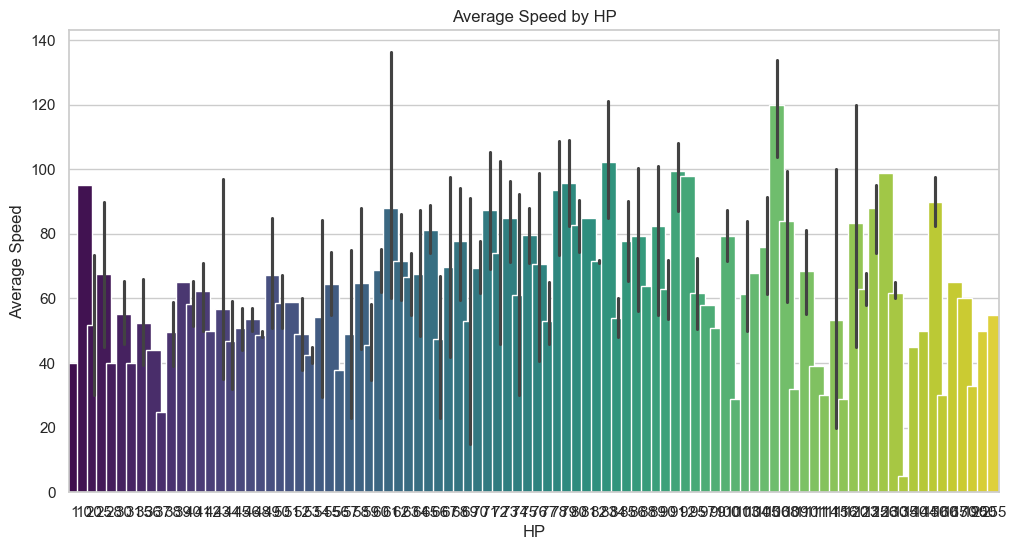

In [57]:
# Bar Chart of Average Speed by HP
plt.figure(figsize=(12, 6))
sns.barplot(x='HP', y='Speed', data=data, estimator=np.mean, palette='viridis', width=1.5)
plt.title('Average Speed by HP')
plt.xlabel('HP')
plt.ylabel('Average Speed')
plt.show()

#### Line Chart

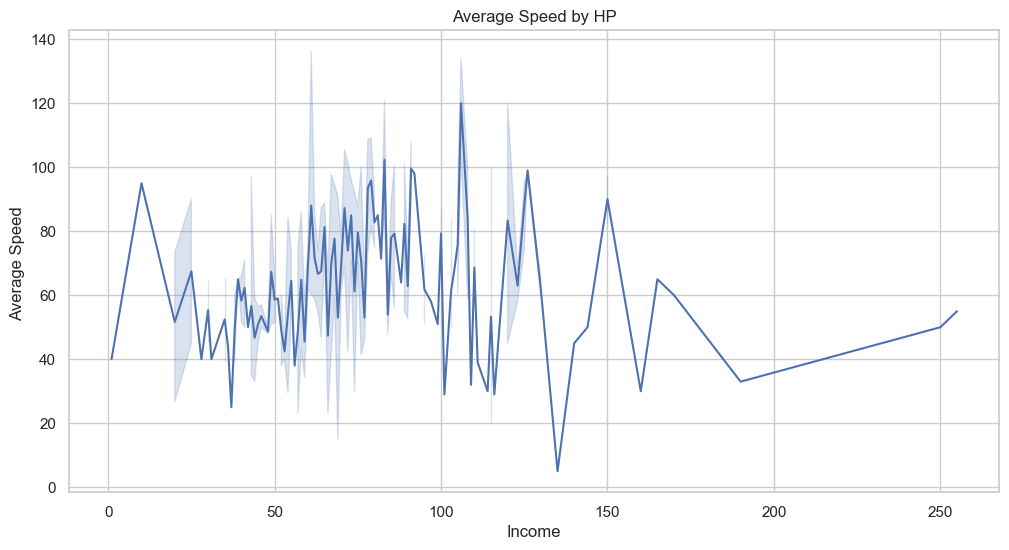

In [58]:
# Line Chart of Average Speed by HP
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='HP', y='Speed', estimator='mean', palette='plasma')
plt.title('Average Speed by HP')
plt.xlabel('Income')
plt.ylabel('Average Speed ')
plt.show()